# Aws deepracer baseline model review 


## Imports

In [17]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

# Plotting model training metrics 


In [25]:
#model training data for 60 episodes
df = pd.read_csv('baseline_training_metrics.csv')


In [26]:
df

,episode,steps,X,Y,yaw,steer,throttle,action,reward,done,all_wheels_on_track,progress,closest_waypoint,track_len,tstamp,episode_status,pause_duration
0,0,1,0.322507,2.691239,-84.006397,-15,0.6,1,0.0000,False,True,0.606162,1,23.118222,17.885,prepare,0
1,0,2,0.322497,2.691373,-84.006075,30,0.6,4,0.8000,False,True,0.605583,1,23.118222,17.955,in_progress,0
2,0,3,0.323028,2.683638,-84.070558,15,0.6,3,1.0000,False,True,0.639096,1,23.118222,18.011,in_progress,0
3,0,4,0.326075,2.664496,-83.819311,30,0.6,4,0.8000,False,True,0.722896,1,23.118222,18.089,in_progress,0
4,0,5,0.332900,2.631901,-83.081175,0,0.6,2,1.0000,False,True,0.866644,1,23.118222,18.146,in_progress,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4059,59,87,1.020086,0.608884,-40.620100,15,0.6,3,0.0010,False,False,13.492891,13,23.118222,387.539,in_progress,0
4060,59,88,1.071635,0.573813,-39.010909,-30,0.6,0,0.0008,False,False,13.492891,13,23.118222,387.599,in_progress,0
4061,59,89,1.102132,0.551899,-38.529065,30,0.6,4,0.0008,False,False,13.492891,13,23.118222,387.680,in_progress,0
4062,59,90,1.164236,0.510617,-37.073530,0,0.6,2,0.0010,False,False,13.764033,13,23.118222,387.758,in_progress,0


In [27]:
episodes = df['episode']
rewards = df['reward']
total_reward = []
mean_rewards = []
scores = []
rewards_sum = 0
rewards_mean = 0

for reward in rewards:
    scores.append(reward)
    rewards_sum += reward
    total_reward.append(rewards_sum)
    rewards_mean = np.mean(scores)
    mean_rewards.append(rewards_mean)



## Rewards per step across 60 episodes

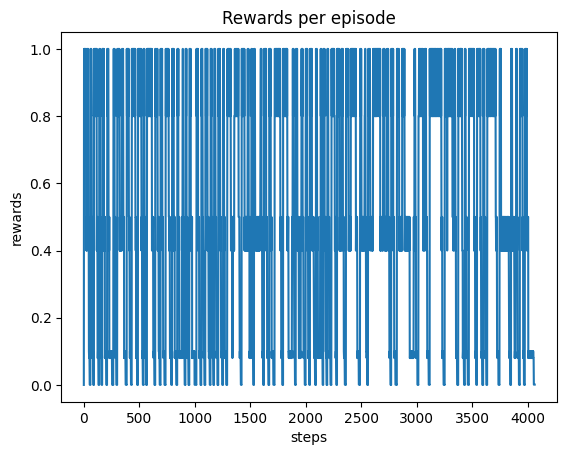

In [28]:
fig_1= plt.figure()
plt.plot(np.arange(len(scores)), scores)
plt.title('Rewards per episode')
plt.xlabel('steps')
plt.ylabel('rewards')
plt.show()

## Avg rewards per step across 60 episodes


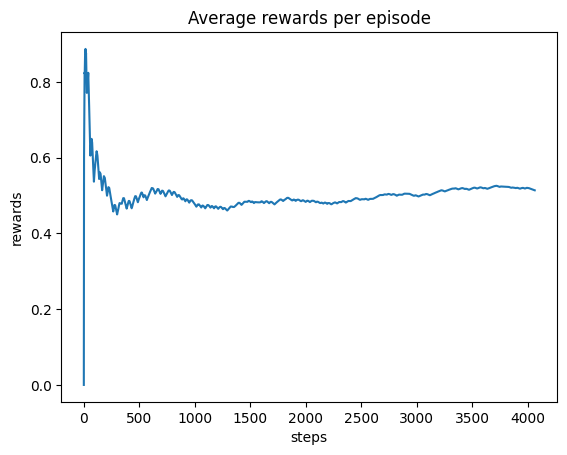

In [31]:
fig_1= plt.figure()
plt.plot(np.arange(len(mean_rewards)), mean_rewards)
plt.title('Average rewards per episode')
plt.xlabel('steps')
plt.ylabel('rewards')
plt.show()

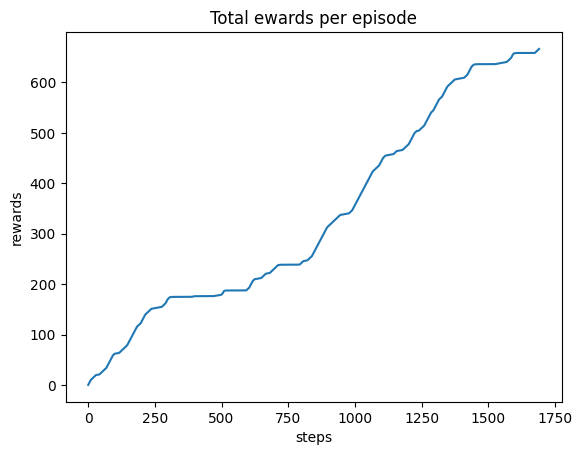

In [40]:
fig_1= plt.figure()
plt.plot(np.arange(len(total_reward)), total_reward)
plt.title('Total ewards per episode')
plt.xlabel('steps')
plt.ylabel('rewards')
plt.show()

## Plotting model evaluation which was trained for 60eps

In [33]:
#model evaluation data for 3 episodes
df = pd.read_csv('baseline_evaluation_metrics.csv')


In [34]:
df

,episode,steps,X,Y,yaw,steer,throttle,action,reward,done,all_wheels_on_track,progress,closest_waypoint,track_len,tstamp,episode_status,pause_duration
0,0,1.0,0.322497,2.691373,-84.006075,30.0,0.6,4,0.0,False,True,0.605583,1,23.118222,3.568,prepare,0.0
1,0,2.0,0.322497,2.691373,-84.006075,30.0,0.6,4,1.0,False,True,0.605583,1,23.118222,3.676,in_progress,0.0
2,0,3.0,0.323969,2.686767,-83.776602,30.0,0.6,4,1.0,False,True,0.626061,1,23.118222,3.750,in_progress,0.0
3,0,4.0,0.327257,2.674560,-83.324980,30.0,0.6,4,1.0,False,True,0.680519,1,23.118222,3.796,in_progress,0.0
4,0,5.0,0.331951,2.660895,-82.563025,30.0,0.6,4,1.0,False,True,0.741899,1,23.118222,3.912,in_progress,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,2,1688.0,0.503083,3.043037,-104.367254,30.0,0.6,4,0.5,False,True,99.056416,153,23.118222,133.134,in_progress,0.0
1688,2,1689.0,0.512825,2.953326,-97.525486,0.0,0.6,2,0.5,False,True,99.510330,153,23.118222,133.180,in_progress,0.0
1689,2,1690.0,0.519011,2.922822,-95.099643,0.0,0.6,2,0.5,False,True,99.643365,153,23.118222,133.290,in_progress,0.0
1690,2,1691.0,0.536080,2.848680,-89.907594,0.0,0.6,2,0.5,False,True,99.967118,154,23.118222,133.332,in_progress,0.0


## Calculating total and average reward

In [35]:
episodes = df['episode']
rewards = df['reward']
total_reward = []
mean_rewards = []
scores = []
rewards_sum = 0
rewards_mean = 0

for reward in rewards:
    scores.append(reward)
    rewards_sum += reward
    total_reward.append(rewards_sum)
    rewards_mean = np.mean(scores)
    mean_rewards.append(rewards_mean)



## Rewards per step across 3 episodes

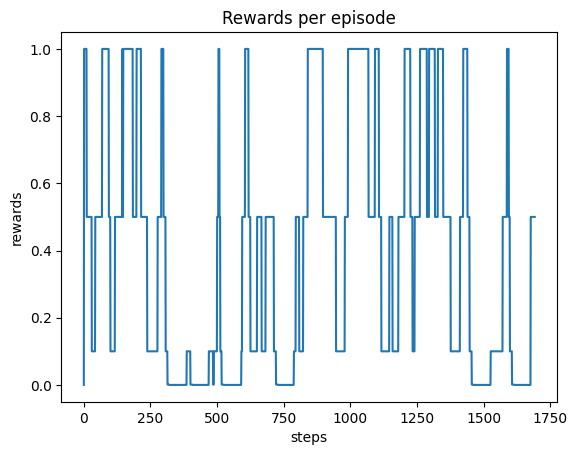

In [36]:
fig_1= plt.figure()
plt.plot(np.arange(len(scores)), scores)
plt.title('Rewards per episode')
plt.xlabel('steps')
plt.ylabel('rewards')
plt.show()

## Avg rewards per step across 3 episodes


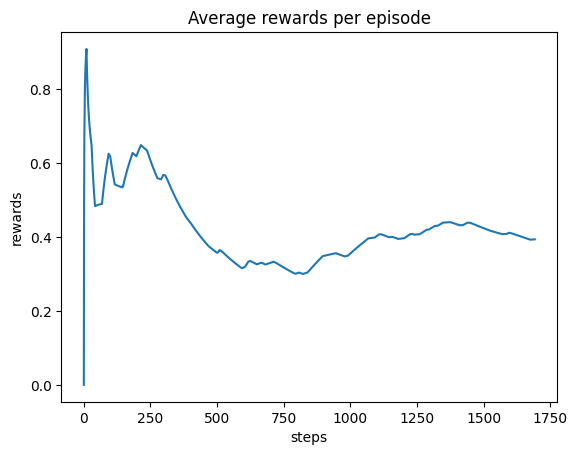

In [37]:
fig_1= plt.figure()
plt.plot(np.arange(len(mean_rewards)), mean_rewards)
plt.title('Average rewards per episode')
plt.xlabel('steps')
plt.ylabel('rewards')
plt.show()

## Total rewards per step across 3 episodes

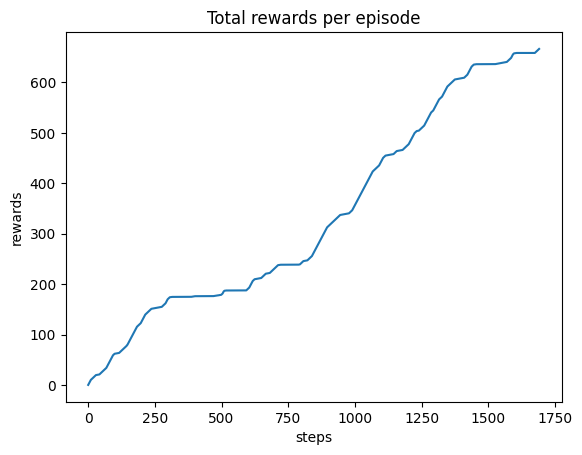

In [38]:
fig_1= plt.figure()
plt.plot(np.arange(len(total_reward)), total_reward)
plt.title('Total rewards per episode')
plt.xlabel('steps')
plt.ylabel('rewards')
plt.show()